# This dataset includes sales data of mobile phones of various companies.
# It is interesting to analyze the data to try to predict the price of a new mobile phone.
# I will do Data Visualization & Analysis - analyze the data using various graphs and statistics.
# In addition, I will try to find the best model to predict new results!

In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data= pd.read_csv('train_mobilePrice.csv', encoding= 'ISO-8859-1')
train_data.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
train_data.shape

(2000, 21)

In [4]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train_data.describe()
# Basic learning on my dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


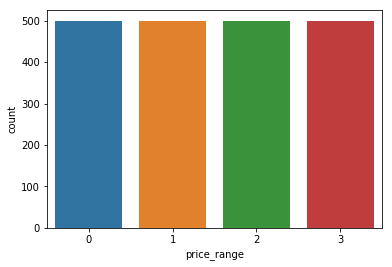

In [6]:
sns.countplot(x = "price_range", data = train_data)

In [7]:
train_data.groupby(['price_range']).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


In [8]:
# It seems that the features: pc, battery power, ram and wifi effect the most (more or less rising). 

In [9]:
# We can also see that between low price (0) and high price (3) there is the most significiant difference, while 1 and 2 are quite similar. 

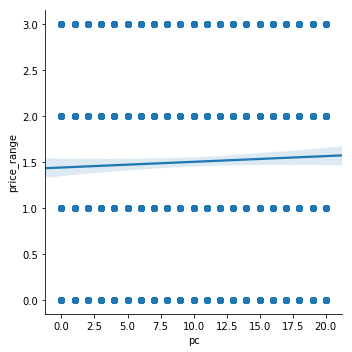

In [10]:
sns.lmplot("pc","price_range",train_data)

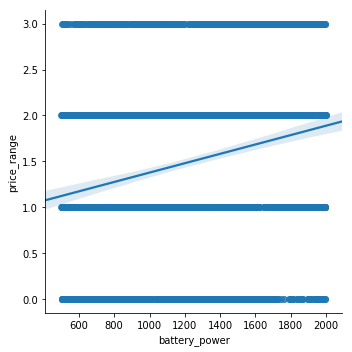

In [11]:
sns.lmplot("battery_power","price_range",train_data)

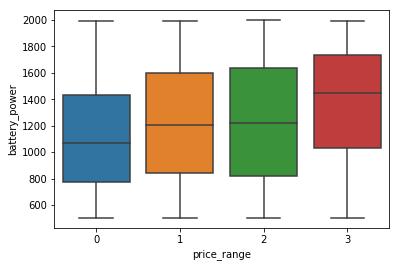

In [12]:
sns.boxplot(x="price_range", y="battery_power", data=train_data)

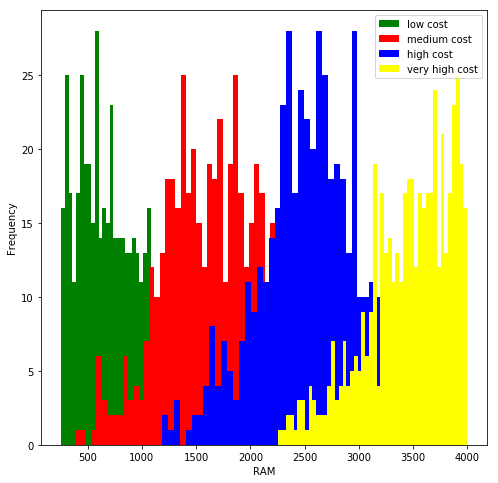

In [13]:
low_cost = train_data[train_data["price_range"] == 0] 
medium_cost = train_data[train_data["price_range"] == 1]
high_cost = train_data[train_data["price_range"] == 2]
very_high_cost = train_data[train_data["price_range"] == 3]

low_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "green", label = "low cost")
medium_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "red", label = "medium cost")
high_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "blue", label = "high cost")
very_high_cost.ram.plot(kind = 'hist',bins = 50,figsize = (8,8), color = "yellow", label = "very high cost")

plt.xlabel('RAM')             
plt.legend()
plt.show()

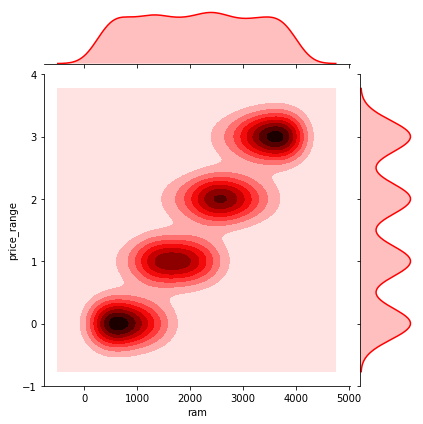

In [14]:
sns.jointplot(x='ram',y='price_range',data=train_data,color='red',kind='kde')

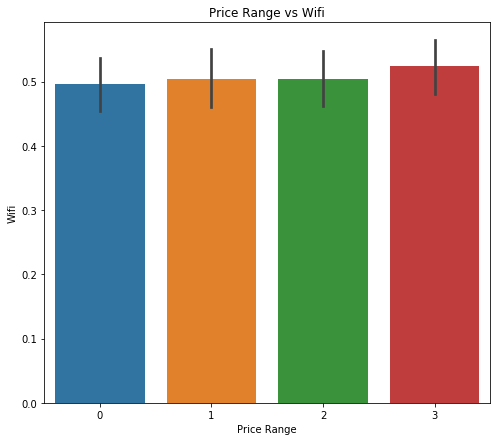

In [15]:
plt.figure(figsize= (8,7))
sns.barplot(x= train_data['price_range'], y= train_data['wifi'])
plt.xlabel('Price Range')
plt.ylabel('Wifi')
plt.title('Price Range vs Wifi')
plt.show()

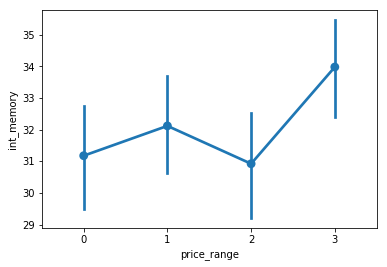

In [16]:
sns.pointplot(y="int_memory", x="price_range", data=train_data)

Text(0.5,0,'MegaPixels')

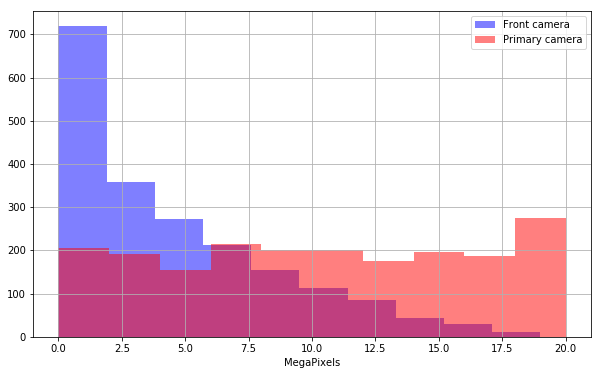

In [17]:
plt.figure(figsize=(10,6))
train_data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train_data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [18]:
train_data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

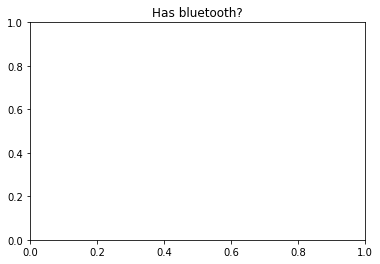

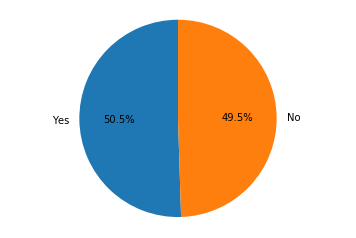

In [19]:
plt.title('Has bluetooth?')
labels = 'Yes', 'No'
sizes=train_data['blue'].value_counts().values
#sizes = [990, 1010]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

Text(0.5,1,'Price Range/ Bluetooth')

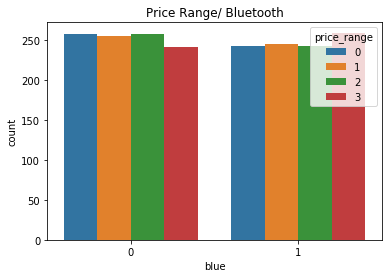

In [20]:
sns.countplot(x='blue', data=train_data, hue='price_range')
plt.title('Price Range/ Bluetooth')
#ax.set(ylim=(0,350))

In [21]:
X = train_data.drop('price_range',axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [22]:
y = train_data['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [24]:
print(X.shape)
print(y.shape)
print(y_train)

(2000, 20)
(2000,)
61      0
853     0
680     3
455     2
130     3
850     3
413     2
1413    2
375     2
835     3
1213    1
1159    0
25      2
792     2
1510    1
536     0
1462    3
583     0
54      2
691     0
33      3
1281    3
1320    1
548     2
1381    3
769     1
1016    0
1736    1
1253    0
1811    1
       ..
883     1
1949    2
371     1
136     1
1530    0
623     2
1875    0
49      3
40      2
477     0
908     1
1029    2
1134    0
1728    1
732     0
316     1
1781    3
936     3
575     2
1668    1
1576    0
973     2
1417    1
75      1
599     0
1599    3
1862    0
1361    0
1547    2
863     0
Name: price_range, Length: 1340, dtype: int64


In [25]:
from sklearn.model_selection import cross_val_score

KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30) 

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [27]:
print(knn.predict(X_test))
print(y_test)
print("test:")
print(knn.score(X_test,y_test))
print("train:")
print(knn.score(X_train, y_train))

[1 1 2 1 0 1 2 1 1 1 0 1 1 1 1 0 0 2 0 1 3 1 2 3 2 2 2 1 0 0 2 3 0 0 3 0 0
 0 1 1 1 2 3 2 3 0 1 3 3 1 0 0 2 3 3 2 0 3 2 3 2 2 3 1 3 1 0 0 0 2 1 2 3 2
 1 3 3 2 0 2 0 0 2 1 2 2 2 1 0 0 3 2 0 2 0 3 2 0 2 3 0 1 3 3 0 2 0 0 2 0 1
 0 3 2 2 1 1 3 1 0 3 3 2 3 1 2 3 2 1 1 1 0 0 1 0 2 3 0 2 2 1 3 0 0 0 1 1 2
 2 0 3 1 3 2 3 2 2 0 3 1 2 2 2 2 1 2 1 1 3 3 1 2 0 3 1 3 2 2 3 1 2 1 0 1 2
 2 1 2 0 3 1 0 2 3 0 2 0 0 3 0 0 1 3 2 1 3 0 2 2 2 1 2 1 3 0 3 0 0 3 1 1 2
 3 0 2 3 3 0 3 1 1 1 0 2 1 2 1 2 2 0 1 2 1 2 0 3 3 2 3 3 1 3 1 1 3 1 0 2 0
 1 1 3 3 0 1 0 1 1 0 2 3 1 3 1 1 2 2 2 0 3 1 3 1 2 3 2 2 1 2 3 2 3 0 1 1 0
 2 1 0 1 3 3 1 2 3 3 1 1 1 1 2 0 0 0 1 1 3 1 2 2 1 3 1 3 0 1 2 0 0 2 2 2 2
 1 0 0 2 2 1 1 2 1 2 0 0 1 0 2 3 3 2 2 2 1 0 3 2 0 0 2 0 3 3 1 0 1 0 2 0 0
 1 0 0 2 1 2 1 3 2 2 2 1 3 0 0 0 0 0 1 0 3 1 3 1 1 1 3 2 0 3 3 2 0 3 2 2 1
 3 1 2 1 2 1 2 2 0 2 0 0 3 1 1 2 1 1 1 3 0 3 1 3 2 3 2 3 2 3 1 1 3 0 0 2 2
 0 0 1 2 0 3 0 3 0 2 0 0 2 2 2 1 0 1 2 2 0 3 2 3 2 3 0 3 2 3 1 2 3 3 2 3 1
 2 0 2 2 1 3 2 1 1 3 3 0 

In [28]:
# I want to find the ideal k, which will bring me the highest accuracy (in "test")

from sklearn import metrics

y_pred= knn.predict(X_test)

k_range = list(range(1, 56))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

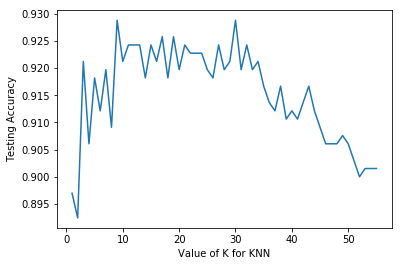

In [29]:
# the connection between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [30]:
# From the above graph it can be concluded that the ideal k in that case is k=30.

In [31]:
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[0.935 0.93  0.92  0.945 0.925 0.935 0.925 0.92  0.895 0.9  ]


In [32]:
print(score.mean())

0.923


Logostic Regresion Model

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 3, 3, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 3, 3,
       3, 0, 2, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 3, 1, 1,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 1, 3, 0, 2, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 2, 1, 1, 2, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 2, 0, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 1, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 0, 2, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 1, 2, 2, 0, 2, 1, 0, 3, 3, 1, 3, 0, 3, 1, 3,
       2, 3, 3, 2, 1, 1, 1, 0, 3, 3, 1, 3, 0, 2, 0, 0, 3, 2, 0, 1, 0, 0,
       3, 0, 0, 2, 3, 2, 1, 3, 0, 3, 1, 3, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 2, 0, 2, 1, 3, 1, 3, 1, 0, 1, 2,
       2, 3, 0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 0, 2, 0, 0, 1, 3, 3, 0,
       1, 0, 1, 2, 0, 3, 3, 1, 3, 1, 1, 2, 1, 2, 0, 3, 1, 3, 1, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0, 1, 3,

In [36]:
len(y_pred_logreg)

660

In [37]:
logreg.score(X_test, y_test)

0.7515151515151515

In [38]:
score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(score)
print(score.mean())

[0.79  0.8   0.77  0.76  0.83  0.745 0.775 0.775 0.785 0.74 ]
0.777


Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [40]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 3, 1,
       3, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 3, 3,
       3, 1, 2, 3, 3, 1, 0, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 1, 3, 2, 2, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 2,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 2, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 1, 3, 0, 1, 0, 1, 0, 3, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 2, 0, 3, 2, 3,
       2, 1, 3, 2, 1, 1, 0, 0, 3, 2, 1, 2, 1, 2, 1, 0, 2, 3, 0, 2, 0, 0,
       3, 0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 1, 3, 3, 1, 3, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 0, 1, 2,
       2, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 0, 2, 0, 1, 1, 3, 3, 0,
       1, 0, 1, 1, 0, 2, 3, 0, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 2, 3,
       3, 2, 3, 3, 2, 3, 0, 2, 2, 0, 2, 1, 0, 1, 3,

In [41]:
GNB.score(X_test, y_test)

0.8090909090909091

In [42]:
cross_val_score(GNB, X, y, cv=10, scoring='accuracy').mean()

0.812

In [43]:
cross_val_score(GNB, X, y, cv=10, scoring='accuracy')

array([0.805, 0.81 , 0.83 , 0.82 , 0.825, 0.835, 0.795, 0.815, 0.795,
       0.79 ])

ADABOOST Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred_abc = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
metrics.accuracy_score(y_test, y_pred_abc)

0.7893939393939394

In [46]:
abc.score(X_test, y_test)

0.7893939393939394

Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
n_scores = []
for n in list(range(1,250)):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    n_scores.append(rfc.score(X_test,y_test))

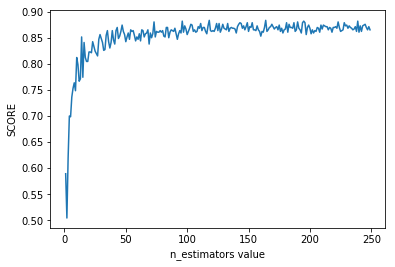

In [49]:
plt.plot(list(range(1,250)), n_scores)
plt.xlabel('n_estimators value')
plt.ylabel('SCORE')
plt.show()

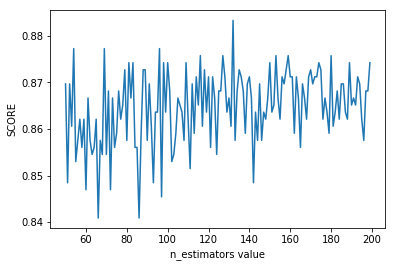

In [50]:
n_scores = []
for n in list(range(50,200)):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    n_scores.append(rfc.score(X_test,y_test))
    
plt.plot(list(range(50,200)), n_scores)
plt.xlabel('n_estimators value')
plt.ylabel('SCORE')
plt.show()

In [52]:
# based on the chart above, i'll choose n value ; n_esimantors = 132

rfc = RandomForestClassifier(n_estimators=132)

In [53]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=132, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rfc.score(X_test,y_test)

0.8878787878787879

In [55]:
score = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(score)
print(score.mean())

[0.91  0.875 0.87  0.885 0.925 0.91  0.89  0.885 0.855 0.865]
0.8870000000000001


In [56]:
# The best model for my dataset: KNN !

PCA (for KNN)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [59]:
print("original shape: ", X_train.shape)
print("transformed shape:  ", X_train_pca.shape)

original shape:  (1340, 20)
transformed shape:   (1340, 2)


In [60]:
d_range = list(range(1, 20))
d_scores = []
for d in d_range:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=30) 
    knn.fit(X_train_pca, y_train)
    scores = knn.score(X_test_pca, y_test)
    d_scores.append(scores.mean())

Text(0,0.5,'SCORE')

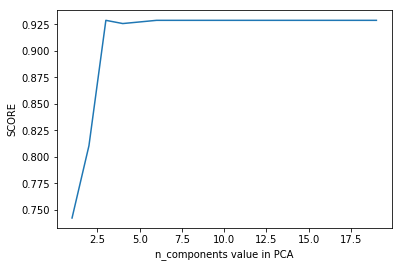

In [61]:
plt.plot(d_range, d_scores)
plt.xlabel('n_components value in PCA')
plt.ylabel('SCORE')

**Error models**

- Classification accuracy

In [62]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9015151515151515


In [63]:
# with pca

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=30) 
knn.fit(X_train_pca, y_train)

print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')


In [64]:
y_pred_pca = knn.predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_pred_pca))

0.9287878787878788


In [65]:
# Distribution of results of the testing set. 
y_test.value_counts()

2    199
0    158
1    152
3    151
Name: price_range, dtype: int64

In [66]:
# Null accuracy: accuracy that could be achieved by always predicting the most frequent class.

In [67]:
y_test.value_counts().head() / len(y_test)

2    0.301515
0    0.239394
1    0.230303
3    0.228788
Name: price_range, dtype: float64

In [68]:
# Comparing the true and predicted response values

# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_pca[0:25])

True: [1 1 2 1 1 1 2 1 1 1 0 1 1 1 1 0 0 2 0 1 3 1 2 3 2]
Pred: [1 1 2 1 0 1 2 1 1 1 0 1 1 1 1 0 0 2 1 1 3 0 2 3 2]


"types" of errors

In [70]:
# classification_report

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_pca))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       158
          1       0.89      0.93      0.91       152
          2       0.94      0.86      0.90       199
          3       0.93      0.94      0.93       151

avg / total       0.93      0.93      0.93       660



In [71]:
# confusion_matrix (multi-class classification)

confusion_matrix(y_test,y_pred_pca)

array([[157,   1,   0,   0],
       [  8, 142,   2,   0],
       [  0,  16, 172,  11],
       [  0,   0,   9, 142]], dtype=int64)

In [72]:
print(metrics.accuracy_score(y_test, y_pred_pca))

0.9287878787878788


In [73]:
test_data = pd.read_csv('test_mobilePrice.csv', encoding= 'ISO-8859-1') 
test_data.head(20)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [74]:
del test_data['id']

In [76]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

predicted_price = knn.predict(test_data)

In [77]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [78]:
test_data['price_range'] = predicted_price

In [79]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
7,833,0,2.4,1,0,0,62,0.8,111,1,...,1312,1880,1495,7,2,18,0,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,...,556,876,3485,11,9,10,1,1,0,3
9,1520,0,0.5,0,1,0,25,0.5,171,3,...,52,1009,651,6,0,5,1,0,1,0
